# Introduction to Machine Learning and Toolkit Exercises 

<a href="https://colab.research.google.com/github/dattali18/machine_learning_msc_course/week1/week_1_intro_to_machine_learning_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab\"></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Introduction

We will be using the iris data set for this tutorial. This is a well-known data set containing iris species and sepal and petal measurements. The data we will use are in a file called `Iris_Data.csv` found in the data directory.

## Question 1

Load the data from the file using the techniques learned today. Examine it.

Determine the following:

* The number of data points (rows). (*Hint:* check out the dataframe `.shape` attribute.)
* The column names. (*Hint:* check out the dataframe `.columns` attribute.)
* The data types for each column. (*Hint:* check out the dataframe `.dtypes` attribute.)

In [2]:
import numpy as np
import pandas as pd
import os

# Daniel: my relative path to the data from the notebook
data_path = "../data/"
filepath = os.path.join(data_path + 'Iris_Data.csv')
data = pd.read_csv(filepath)
print("Cols:",data.columns,"\nshape:",data.shape)
print("shape 0 :",data.shape[0])
data.head()

Cols: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object') 
shape: (150, 5)
shape 0 : 150


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


*Daniel* : I successfully opened the Iris data set and read it into a pandas object

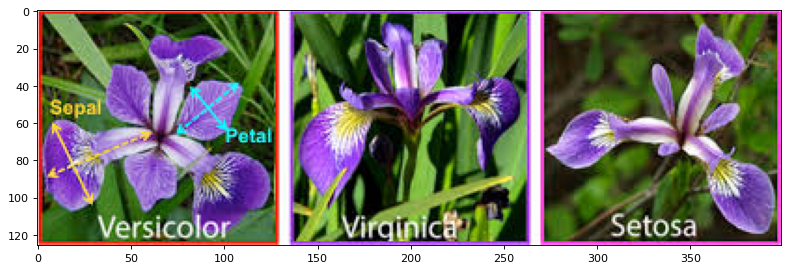

In [4]:
import matplotlib.image as mpimg 
from matplotlib.pyplot import imshow, figure
%matplotlib inline
filepath = os.path.join(data_path + 'iris.jpeg')
testim = mpimg.imread(filepath)
# figure(figsize=(10, 8), dpi=80)
figure(figsize=(12, 10), dpi=80)
imshow(testim)

*Daniel*: Changed the size of the images using the `figsize` tuple

note: the following explanation is from  the Python Data Science Handbook by Jake VanderPlas; the content is available on GitHub. 

Here each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset.
In general, we will refer to the rows of the matrix as *samples*, and the number of rows as ``n_samples``.

Likewise, each column of the data refers to a particular quantitative piece of information that describes each sample.
In general, we will refer to the columns of the matrix as *features*, and the number of columns as ``n_features``.

#### Features matrix

This table layout makes clear that the information can be thought of as a two-dimensional numerical array or matrix, which we will call the *features matrix*.
By convention, this features matrix is often stored in a variable named ``X``.
The features matrix is assumed to be two-dimensional, with shape ``[n_samples, n_features]``, and is most often contained in a NumPy array or a Pandas ``DataFrame``, though some Scikit-Learn models also accept SciPy sparse matrices.

The samples (i.e., rows) always refer to the individual objects described by the dataset.
For example, the sample might be a flower, a person, a document, an image, a sound file, a video, an astronomical object, or anything else you can describe with a set of quantitative measurements.

The features (i.e., columns) always refer to the distinct observations that describe each sample in a quantitative manner.
Features are generally real-valued, but may be Boolean or discrete-valued in some cases.

#### Target array

In addition to the feature matrix ``X``, we also generally work with a *label* or *target* array, which by convention we will usually call ``y``.
The target array is usually one dimensional, with length ``n_samples``, and is generally contained in a NumPy array or Pandas ``Series``.
The target array may have continuous numerical values, or discrete classes/labels.
While some Scikit-Learn estimators do handle multiple target values in the form of a two-dimensional, ``[n_samples, n_targets]`` target array, we will primarily be working with the common case of a one-dimensional target array.

Often one point of confusion is how the target array differs from the other features columns. The distinguishing feature of the target array is that it is usually the quantity we want to *predict from the data*: in statistical terms, it is the dependent variable.
For example, in the preceding data we may wish to construct a model that can predict the species of flower based on the other measurements; in this case, the ``species`` column would be considered the target array.

With this target array in mind, we can use Seaborn (see [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)) to conveniently visualize the data:

## Data Exploration

In [5]:
# Number of rows
print(data.shape[0])

# Column names
print(data.columns.tolist())

# Data types
print(data.dtypes)


150
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


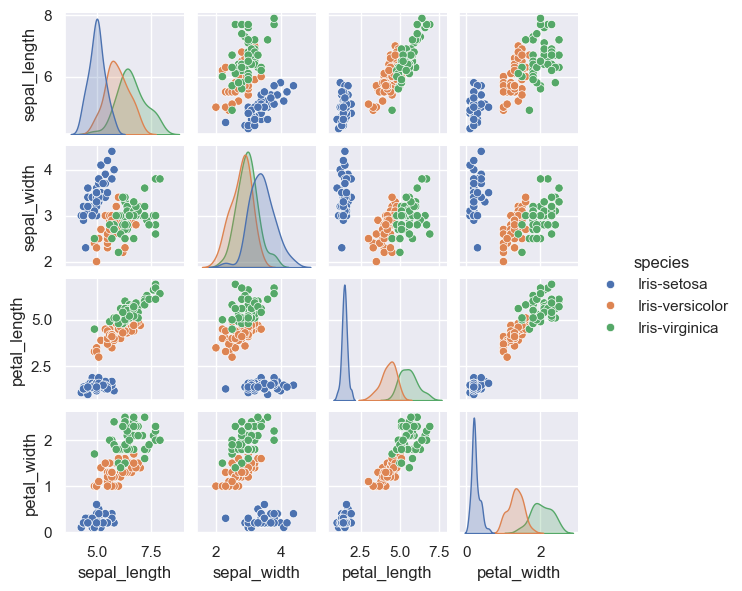

In [7]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(data, hue='species', height=1.5);

## Question 2

Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter. 

*Hint:* there are multiple ways to do this, but you could use either the [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) or the [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html).

In [8]:
# The str method maps the following function to each entry as a string
data['species'] = data.species.str.replace('Iris-', 'I-')
# alternatively
# data['species'] = data.species.apply(lambda r: r.replace('Iris-', ''))

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,I-setosa
1,4.9,3.0,1.4,0.2,I-setosa
2,4.7,3.2,1.3,0.2,I-setosa
3,4.6,3.1,1.5,0.2,I-setosa
4,5.0,3.6,1.4,0.2,I-setosa


## Question 3

Determine the following:  
* The number of each species present. (*Hint:* check out the series `.value_counts` method.)
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

*Hint:* for the last question, the `.describe` method does have median, but it's not called median. It's the *50%* quantile. `.describe` does not have range though, and in order to get the range, you will need to create a new entry in the `.describe` table, which is `max - min`.

In [10]:
# Student writes code here
# data.mean()

# Daniel: get the number of different species
# get the species column then put into a set to remove duplicate
# print the len(set())
print(f"Number of different species: {len(set(data['species']))}")

#ariellac
data.describe()



Number of different species: 3


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
# get the range for each feature
for feature in data.columns[:-1]:  # Exclude the species column
    data_range = data[feature].max() - data[feature].min()
    print(f"Range for {feature}: {data_range}")

Range for sepal_length: 3.6000000000000005
Range for sepal_width: 2.4000000000000004
Range for petal_length: 5.9
Range for petal_width: 2.4


## Question 4

Calculate the following **for each species** in a separate dataframe:

* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

*Hint:* you may want to use Pandas [`groupby` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) to group by species before calculating the statistic.

If you finish both of these, try calculating both statistics (mean and median) in a single table (i.e. with a single groupby call). See the section of the Pandas documentation on [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) for a hint.

In [13]:
# The mean calculation
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
I-setosa,5.006,3.418,1.464,0.244
I-versicolor,5.936,2.770,4.260,1.326
I-virginica,6.588,2.974,5.552,2.026


In [14]:
# The median calculation
data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
I-setosa,5.0,3.4,1.50,0.2
I-versicolor,5.9,2.8,4.35,1.3
I-virginica,6.5,3.0,5.55,2.0


In [16]:
# applying multiple functions at once - 2 methods

data.groupby('species').agg(['mean', 'median'])  # passing a list of recognized strings
# data.groupby('species').agg([np.mean, np.median])  # passing a list of explicit aggregation functions

sepal_length        sepal_width        petal_length         \
                     mean median        mean median         mean median   
species                                                                   
I-setosa            5.006    5.0       3.418    3.4        1.464   1.50   
I-versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
I-virginica         6.588    6.5       2.974    3.0        5.552   5.55   

             petal_width         
                    mean median  
species                          
I-setosa           0.244    0.2  
I-versicolor       1.326    1.3  
I-virginica        2.026    2.0

In [17]:
# If certain fields need to be aggregated differently, we can do:
from pprint import pprint

agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'species'}
agg_dict['petal_length'] = 'max'
pprint(agg_dict)
data.groupby('species').agg(agg_dict)

{'petal_length': 'max',
 'petal_width': ['mean', 'median'],
 'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median']}


sepal_length        sepal_width        petal_length petal_width  \
                     mean median        mean median          max        mean   
species                                                                        
I-setosa            5.006    5.0       3.418    3.4          1.9       0.244   
I-versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
I-virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                     
             median  
species              
I-setosa        0.2  
I-versicolor    1.3  
I-virginica     2.0

## Question 5

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

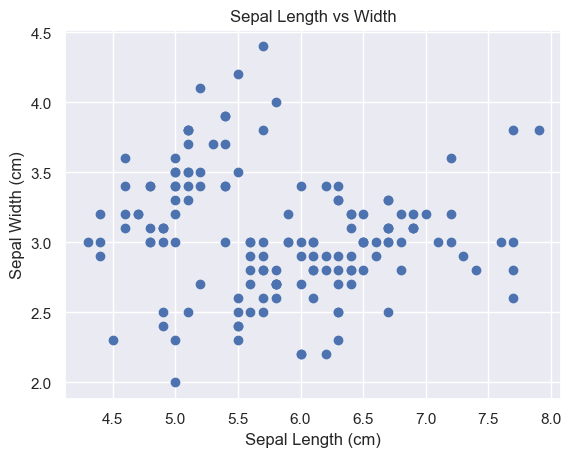

In [19]:
# A simple scatter plot with Matplotlib
ax = plt.axes()

ax.scatter(data.sepal_length, data.sepal_width)

# Label the axes
ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width');

# Classification

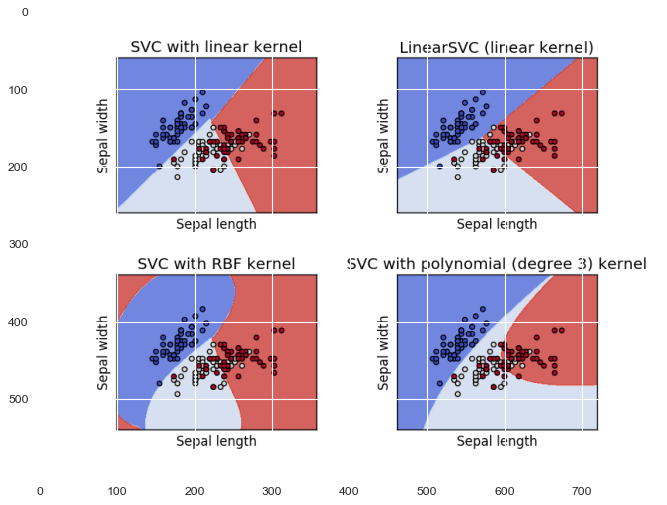

In [20]:
filepath = os.path.join(data_path + 'iris_classification.png')
testim = mpimg.imread(filepath)
figure(figsize=(10, 8), dpi=80)
imshow(testim)

# Regression

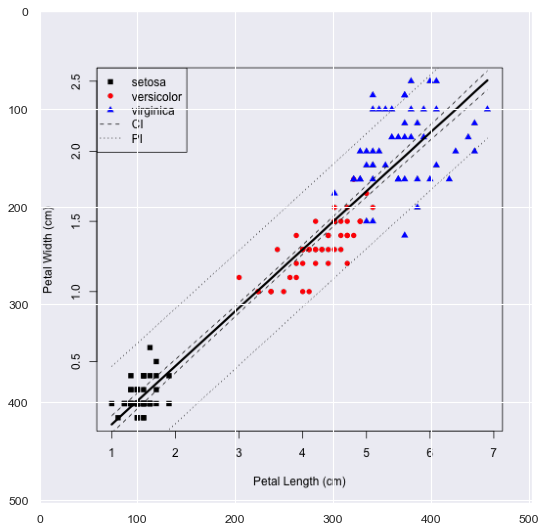

In [21]:
filepath = os.path.join(data_path + 'iris_regression.png')
testim = mpimg.imread(filepath)
figure(figsize=(10, 8), dpi=80)
imshow(testim)

# Clustering

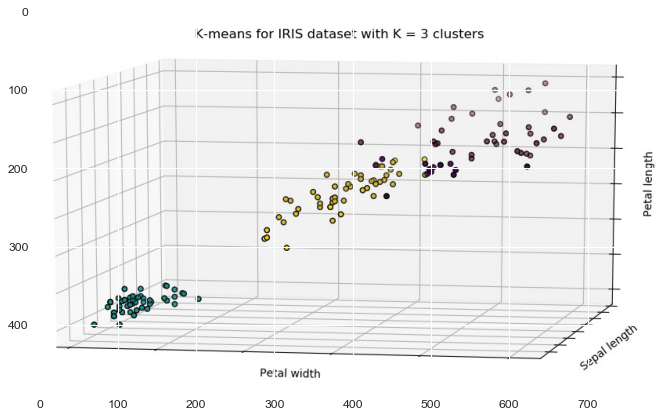

In [22]:
filepath = os.path.join(data_path + 'iris_clustering.jpg')
testim = mpimg.imread(filepath)
figure(figsize=(10, 8), dpi=80)
imshow(testim)

## Question 6

Make a histogram of any one of the four features. Label axes and title it as appropriate. 

In [23]:
#Student writes code here
data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]



,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


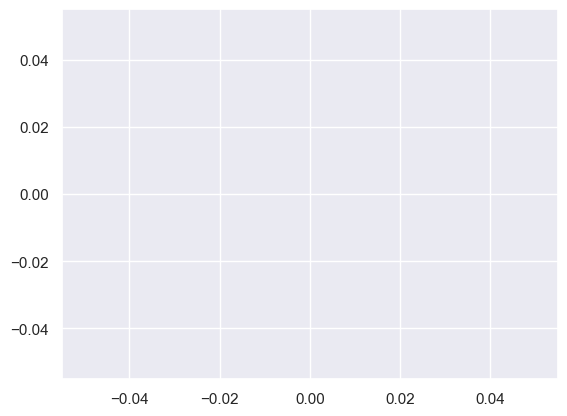

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pc = pca.fit_transform(data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
idx_0 = data['species'] == "setosa"
idx_1 = data['species'] == "versicolor"
idx_2 = data['species'] == "virginica"

plt.scatter(pc[idx_0,0], pc[idx_0,1],c='r')
plt.scatter(pc[idx_1,0], pc[idx_1,1],c='g')
plt.scatter(pc[idx_2,0], pc[idx_2,1],c='b')


## Question 7

Now create a single plot with histograms for each feature (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) overlayed. If you have time, next try to create four individual histogram plots in a single figure, where each plot contains one feature.

For some hints on how to do this with Pandas plotting methods, check out the [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html) for Pandas.

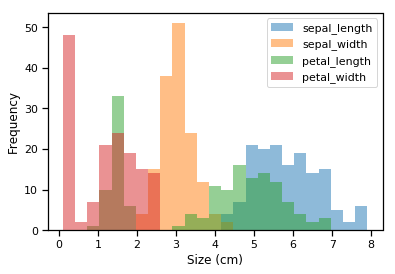

In [ ]:
import seaborn as sns

sns.set_context('notebook')

# This uses the `.plot.hist` method
ax = data.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('Size (cm)');

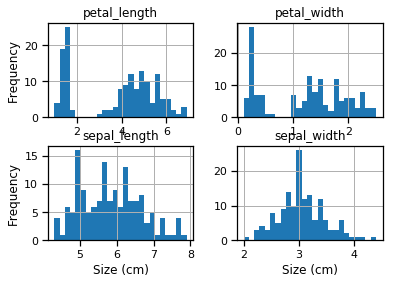

In [ ]:
# To create four separate plots, use Pandas `.hist` method
axList = data.hist(bins=25)

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Size (cm)')
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')

## Question 8

Using Pandas, make a boxplot of each petal and sepal measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

In [ ]:
#Student writes code here

## Question 9

Now make a single boxplot where the features are separated in the x-axis and species are colored with different hues. 

*Hint:* you may want to check the documentation for [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html). 

Also note that Seaborn is very picky about data format--for this plot to work, the input dataframe will need to be manipulated so that each row contains a single data point (a species, a measurement type, and the measurement value). Check out Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) method as a starting place.

Here is an example of a data format that will work:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

In [26]:
# First we have to reshape the data so there is 
# only a single measurement in each column

plot_data = (data
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

plot_data.head()

,species,measurement,size
0,I-setosa,sepal_length,5.1
1,I-setosa,sepal_width,3.5
2,I-setosa,petal_length,1.4
3,I-setosa,petal_width,0.2
4,I-setosa,sepal_length,4.9


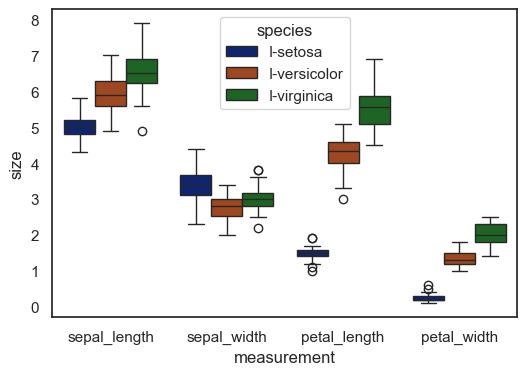

In [27]:
# Now plot the dataframe from above using Seaborn

sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size', 
            hue='species', data=plot_data);

## Question 10

Make a [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) with Seaborn to examine the correlation between each of the measurements.

*Hint:* this plot may look complicated, but it is actually only a single line of code. This is the power of Seaborn and dataframe-aware plotting! See the lecture notes for reference.

In [ ]:
#Student writes code here